In [52]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

In [53]:
train= pd.read_csv('train_titanic.csv')
test= pd.read_csv('test_titanic.csv')

In [54]:
train_objs_sum= len(train)

In [55]:
#concatenate train and test
y_train= train['Survived']
dataset= pd.concat(objs=[train.drop(columns=['Survived']), test], axis=0)

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


,Total,Percent
Cabin,1014,0.774637
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
Ticket,0,0.000000


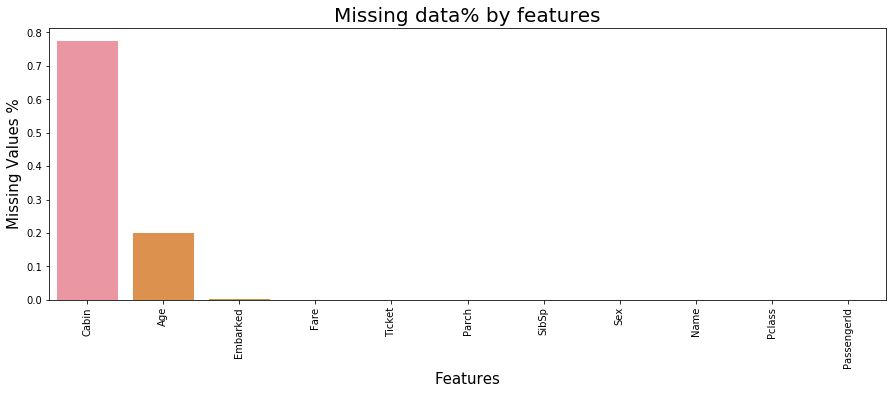

In [16]:
total= dataset.isnull().sum().sort_values(ascending=False)
percent= (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax= plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
sns.barplot(x= missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Missing Values %', fontsize=15)
plt.title('Missing data% by features', fontsize=20)
missing_data.head()

In [17]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


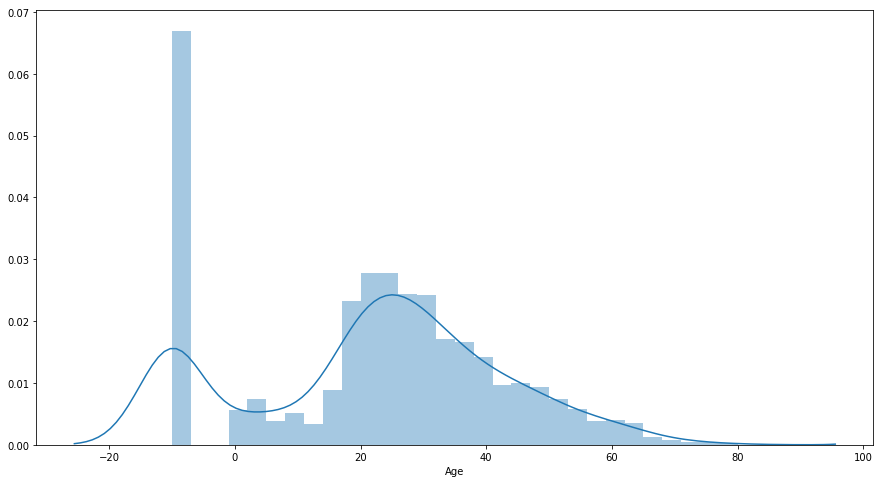

In [34]:
# Plot histogram using seaborn to check missing values
plt.figure(figsize=(15,8))
sns.distplot(dataset.Age.fillna(-10), bins=30)

In [48]:
df= dataset
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [49]:
df= dataset
df.dropna(how='all', inplace=True)
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [50]:
df= dataset
df.dropna(thresh=10, axis=1, inplace=True)
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [59]:
df= dataset.copy()
df.fillna(method='bfill', inplace=True)
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            2
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          3
Embarked       0
dtype: int64

In [60]:
df= dataset.copy()
df.fillna(method='ffill', inplace=True)
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [70]:
df= train.copy()
df['Age'].isnull().sum()

177

In [71]:
print(df['Age'].mean())
df['Age'].replace(np.NaN, df['Age'].mean(), inplace=True)

29.69911764705882


In [80]:
df= train.copy()
df['Age'].isnull().sum()

177

In [81]:
print(df['Age'].median())
df['Age'].replace(np.NaN, df['Age'].median(), inplace=True)
df.head()

28.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
df= train.copy()
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [88]:
df= train.copy()
df['Embarked'].mode()[0]

'S'

In [90]:
df= train.copy()
print(df['Age'].median())
df['Age'].fillna(df['Age'].median(), inplace=True)
df.head()


28.0


0

In [91]:
df= train.copy()
df['Cabin'].isnull().sum()

687

In [92]:
df['Cabin'].fillna('U', inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
